# House Prices: Advanced Regression Techniques
## Solution by Hodaya Gavra, July 2018

<img src="http://www.pybloggers.com/wp-content/uploads/2017/05/www.dataquest.iokaggle-8dd612777cbff63f4b69cb73259040a782028cf7.jpg" ,width=1000, height=100>

<a id='content'></a>
## Table of Contents:

1. [**Chapter1:Define the Problem**](#Chapter1:Define the Problem)
2. [**Chapter2:Gather the Data and Import Libraries**](#Chapter2:Gather the Data)
3. [**Chapter3:Exploratory Analysis**](#Chapter3:Exploratory Analysis):
   - [Basic Information](#Basic Information)
   - [Numeric Distributions](#Numeric Distributions)
   - [Categorical Distributions](#Categorical Distributions)
   - [Segmentations](#Segmentations) relationships between categorical features and numeric features
   - [Correlations](#Correlations) relationships between numeric features and other numeric features  
4. [**Chapter4:Data Cleaning**](#Chapter4:Data Cleaning): 
   - [Unwanted Observations](#Unwanted Observations)
   - [Structural Errors](#Structural Errors)
   - [Unwanted Outliers](#Unwanted Outliers)
   - [Missing Categorical Data](#Missing Categorical Data)
   - [Missing Numeric Data](#Missing Numeric Data)
   - [Pipeline for DataCleaning](#Pipeline for DataCleaning)
5. [**Chapter5:Feature Engineering**](#Chapter5:Feature Engineering): 
   - [Business knowledge](#Business knowledge)
   - [Interaction Features](#Interaction Features) represent custom relationships between different features
   - [Sparse Classes](#Sparse Classes)
   - [Remove Unused](#Remove Unused)
   - [Dummy Variables](#Dummy Variables)
   - [Pipeline for FeatureEngineering](#Pipeline for FeatureEngineering)
6. [**Chapter6:Model Training**](#Chapter6:Model Training): 
   - [Split Dataset](#Split Dataset)
   - [Model Pipelines](#Model Pipelines)
   - [Declare hyperparameters to tune](#Declare hyperparameters to tune)
   - [Fit and tune models with cross-validation](#Fit and tune models with cross-validation)
   - [Select Winner](#Select Winner)
6. [**Chapter7:Conclusion**](#Chapter7:Conclusion)


<a id='Chapter1:Define the Problem'></a>
## Chapter1:Define the Problem
[Back to Table of Contents](#content)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this [competition][1] challenges you to predict the final price of each home.

[1]: https://www.kaggle.com/c/house-prices-advanced-regression-techniques#description "Link to the competition"

<a id='Chapter2:Gather the Data'></a>
## Chapter2:Gather the Data and Import Libraries
[Back to Table of Contents](#content)

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

The dataset is given to us [here][1]

[1]: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data "The data"


In [700]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

#ignore annoying warning (from sklearn and seaborn)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

# Scikit-Learn for Modeling
import sklearn

# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

#  import the preprocessing techniques we want to use: For standardization and FunctionTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV,cross_val_predict

# To calculate R2 on the test set, we can import the r2_score() function
from sklearn.metrics import r2_score

# To calculate this metric on the test set, we can import the mean_absolute_error() function:
from sklearn.metrics import mean_absolute_error

# for Plotting Cross-Validated Predictions
from sklearn.model_selection import cross_val_predict

In [598]:
# Load the train data from CSV
df = pd.read_csv("train.csv")#,index_col='Id')
print(df.shape)
#Example observations:
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The test data from Kaggle doesnt have the Target: the SalePrice feature.
Only after submitting the predictions we will know what is our score.

1. Basically, the best way to do this project is probably to split the train set to train and test (we can call it "dev")
But our train data is too small (only 1460 rows) so we will deal with it by CV.
2. We only need to make sure that when we do any predictions or transformations - to do it on the train and not on the test
3. All the data cleaning etc will be on the whole 1460 rows for convenience.
4. Create Pipelines for doing exactly the same steps for the test data from Kaggle.


In [557]:
# Load the test data from CSV - we will use it later after creating the Pipelines for Data Cleaning and Feature Engineering:
df_test = pd.read_csv("test.csv")#,index_col='Id')
print(df_test.shape)
df_test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<a id='Chapter3:Exploratory Analysis'></a>
## Chapter3:Exploratory Analysis
[Back to Table of Contents](#content)

There are many features so in the next three sub-chapters we will do quick explorations to get to know the dataset.
In the fourth sub-chapter ('Segmentations') we are going to do Feature Impotance to get to know which features we should explore more.

<a id='Basic Information'></a>
### Basic Information
[Back to Chapter3:Exploratory Analysis](#Chapter3:Exploratory Analysis)

In [560]:
df.shape

(1460, 81)

we have 1460 observations and 81 features.
Although one of those features is technically the target variable.

Let us start with target variable exploration - 'SalePrice'. First let us do a scatter plot to see if there are any outliers in the data.

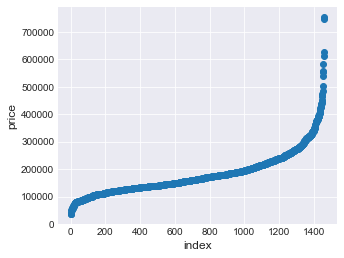

In [561]:
plt.figure(figsize=(5,4))
plt.scatter(range(df.shape[0]), np.sort(df.SalePrice.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

There are few outliers. we will deal with that later ([Chapter4:Data Cleaning:Unwanted Outliers](#Unwanted Outliers)).

Also since the metric is RMSLE, I think it is okay to have it as such.

We can now bin the 'SalePrice' and plot it:

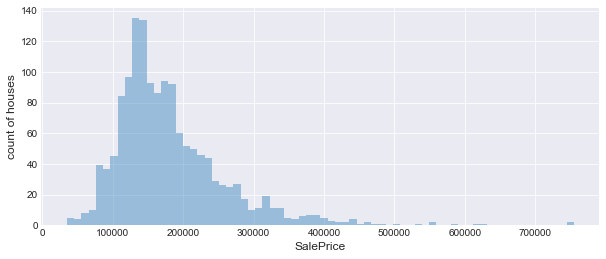

In [562]:
plt.figure(figsize=(10,4))
sns.distplot(df.SalePrice.values, bins=70, kde=False,norm_hist=False)
plt.xlabel('SalePrice',fontsize=12)
plt.ylabel('count of houses',fontsize=12)

plt.show()

Certainly a very long right tail. Since our metric is Root Mean Square Logarithmic error,
we will do a Log-transformation of the target variable:

In [599]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log1p(df["SalePrice"])

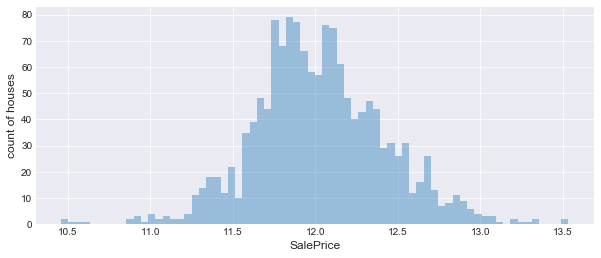

In [600]:
plt.figure(figsize=(10,4))
sns.distplot(df.SalePrice.values, bins=70, kde=False,norm_hist=False)
plt.xlabel('SalePrice',fontsize=12)
plt.ylabel('count of houses',fontsize=12)

plt.show()

This looks much better than the previous one.

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

we have 38 numeric features(int64 or float64) and 43 object features.
Check to see if any data types are incorrect:

In [566]:
"""Check if any numeric features should be categorical instead:"""
#output a list of the numeric features and check their definitions in the "data desription" CSV.
df.select_dtypes(include='number').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

This is what we will do in the next chapters (after we will get the predictions we can consider of doing different 
steps in order to improve the predictions):

* drop Id - **irrelevant. drop this feature**
* MSSubClass:Identifies the type of dwelling involved in the sale. **change to Categorical**
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* OverallQual: Rates the overall material and finish of the house **change to Categorical**
* OverallCond: Rates the overall condition of the house **change to Categorical**
* YearBuilt: Original construction date **create new feature (YrSold-YearBuilt=HouseAge)**
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions) **create new feature (YrSold-YearRemodAdd=RemodAge). If RemodAge=HouseAge then RemodAge=0**
* MasVnrArea: Masonry veneer area in square feet
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
* KitchenAbvGr: Kitchens above grade
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Fireplaces: Number of fireplaces
* GarageYrBlt: Year garage was built **create new feature (YrSold-GarageYrBlt=GarageAge)**
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold (MM)  **change to Categorical**
* YrSold: Year Sold (YYYY) **change to Categorical-new feature for year sale (ther are 5 values)**
* SalePrice

**Drop 'Alley','FireplaceQu','PoolQC','Fence','MiscFeature' from the dataset beacuse most of there values are null**

In [567]:
"""check if any categorical features should be numeric instead:"""
#output a list of the categorical features and check their definitions in the "data desription" CSV.
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

This is what we will do in the next chapters (after we will get the predictions we can consider of doing different 
steps in order to improve the predictions):
* MSZoning: Identifies the general zoning classification of the sale.
* Street: Type of road access to property
* Alley: Type of alley access to property
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to various conditions
* Condition2: Proximity to various conditions (if more than one is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* ExterQual: Evaluates the quality of the material on the exterior 
* ExterCond: Evaluates the present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Evaluates the height of the basement
* BsmtCond: Evaluates the general condition of the basement
* BsmtExposure: Refers to walkout or garden level walls
* BsmtFinType1: Rating of basement finished area
* BsmtFinType2: Rating of basement finished area (if multiple types)
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning **change to numeric: 1=Yes, 0=No**
* Electrical: Electrical system
* KitchenQual: Kitchen quality
* Functional: Home functionality (Assume typical unless deductions are warranted)
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageFinish: Interior finish of the garage
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* SaleType: Type of sale
* SaleCondition: Condition of sale

#### more exploration:

In [568]:
"""basement"""
df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'
    ,'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
BsmtFinSF1      1460 non-null int64
BsmtFinSF2      1460 non-null int64
BsmtUnfSF       1460 non-null int64
TotalBsmtSF     1460 non-null int64
BsmtFullBath    1460 non-null int64
BsmtHalfBath    1460 non-null int64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
dtypes: int64(6), object(5)
memory usage: 125.5+ KB


There are some houses with data on a basement but where BsmtQual/BsmtCond/BsmtExposure/BsmtFinType1/BsmtFinType2
is NA it means 'No Basement'. Lets see the rows:

In [569]:
dfBsmt=df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'
    ,'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']]

dfBsmt_any_null=dfBsmt[dfBsmt.isnull().any(axis=1)]
dfBsmt_any_null

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
39,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
90,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
102,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
156,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
182,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
259,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
332,1124,479,1603,3206,1,0,Gd,TA,No,GLQ,NaN
342,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
362,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


Now I see that most of the null values are make sense because the other feature's values are 0.
Lets see the rows without the zeros:

In [570]:
dfBsmt_any_null[(dfBsmt_any_null.BsmtUnfSF>0)]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
332,1124,479,1603,3206,1,0,Gd,TA,No,GLQ,NaN
948,0,0,936,936,0,0,Gd,TA,NaN,Unf,Unf


- index 948 is not Ok. I think we should drop this row.

- index 332 is Ok - only BsmtFinType2 is null and thats fine by definition


lets see the rows with the same value in BsmtFinType1 and BsmtFinType2 (by definition,BsmtFinType2 is supposed to be different from BsmtFinType1):

In [571]:
print(len(df[df.BsmtFinType1==df.BsmtFinType2]))
df[df.BsmtFinType1==df.BsmtFinType2].head()

431


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,11.774528
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,306.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1494,1494,GasA,Ex,Y,SBrkr,1494,0,0,1494,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,840,TA,TA,Y,160,33,0,0,0,0,NaN,NaN,NaN,0,8,2007,New,Partial,12.540761
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,11.790565
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,380.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1158,1158,GasA,Ex,Y,SBrkr,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,RFn,3,853,TA,TA,Y,240,154,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,12.692506
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Unf,7,7,1930,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,637,637,GasA,Ex,Y,FuseF,1108,0,0,1108,0,0,1,0,3,1,Gd,6,Typ,1,Gd,Attchd,1930.0,Unf,1,280,TA,TA,N,0,0,205,0,0,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,11.845110


lets see the rows with the same value in BsmtFinType1 and BsmtFinType2 but different values between BsmtFinSF1 and BsmtFinSF2:

In [572]:
df[(df.BsmtFinType1==df.BsmtFinType2)&(df.BsmtFinSF1!=df.BsmtFinSF2)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
680,681,120,RL,50.0,8012,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,TwnhsE,1Story,6,5,1980,1980,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,BLQ,543,BLQ,119,261,923,GasA,TA,Y,SBrkr,923,0,0,923,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1980.0,RFn,1,264,TA,TA,Y,80,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,11.870607


Right now it seems to be a few problematic rows.
In the meantime, we'll leave it this way and maybe later we'll do something about it (drop, change etc.)

In [573]:
"""fireplace"""
df[['Fireplaces','FireplaceQu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
Fireplaces     1460 non-null int64
FireplaceQu    770 non-null object
dtypes: int64(1), object(1)
memory usage: 22.9+ KB


lets see the rows where Fireplaces is nou null:

In [574]:
df.loc[df.Fireplaces!=0,['Fireplaces','FireplaceQu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 1 to 1457
Data columns (total 2 columns):
Fireplaces     770 non-null int64
FireplaceQu    770 non-null object
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


this feature looks OK

In [575]:
"""garage"""
df[['GarageYrBlt','GarageCars','GarageArea','GarageType','GarageFinish','GarageQual','GarageCond']].info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
GarageYrBlt     1379 non-null float64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
GarageType      1379 non-null object
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 79.9+ KB


In [576]:
dfGarage=df[['GarageYrBlt','GarageCars','GarageArea','GarageType','GarageFinish','GarageQual','GarageCond']]

dfGarage_any_null=dfGarage[dfGarage.isnull().any(axis=1)]
print(len(dfGarage_any_null))
dfGarage_any_null

81


,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
39,NaN,0,0,NaN,NaN,NaN,NaN
48,NaN,0,0,NaN,NaN,NaN,NaN
78,NaN,0,0,NaN,NaN,NaN,NaN
88,NaN,0,0,NaN,NaN,NaN,NaN
89,NaN,0,0,NaN,NaN,NaN,NaN
99,NaN,0,0,NaN,NaN,NaN,NaN
108,NaN,0,0,NaN,NaN,NaN,NaN
125,NaN,0,0,NaN,NaN,NaN,NaN
127,NaN,0,0,NaN,NaN,NaN,NaN
140,NaN,0,0,NaN,NaN,NaN,NaN


Lets see the rows without the zeros:

In [577]:
dfGarage_any_null[(dfGarage_any_null.GarageCars>0) | (dfGarage_any_null.GarageArea>0)]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond


this feature looks OK

In [578]:
"""pool"""
df[['PoolArea','PoolQC']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
PoolArea    1460 non-null int64
PoolQC      7 non-null object
dtypes: int64(1), object(1)
memory usage: 22.9+ KB


In [579]:
df.loc[df.PoolArea!=0,['PoolArea','PoolQC']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 197 to 1423
Data columns (total 2 columns):
PoolArea    7 non-null int64
PoolQC      7 non-null object
dtypes: int64(1), object(1)
memory usage: 168.0+ bytes


In [580]:
df.loc[df.PoolArea!=0,['PoolArea','PoolQC','SalePrice']]

,PoolArea,PoolQC,SalePrice
197,512,Ex,12.367345
810,648,Fa,12.106258
1170,576,Gd,12.049425
1182,555,Ex,13.521141
1298,480,Gd,11.982935
1386,519,Fa,12.429220
1423,738,Gd,12.524421


Only 7 rows are with data on the pool. maybe we will drop those 2 features later.

<a id='Numeric Distributions'></a>
### Numeric Distributions
[Back to Chapter3:Exploratory Analysis](#Chapter3:Exploratory Analysis)

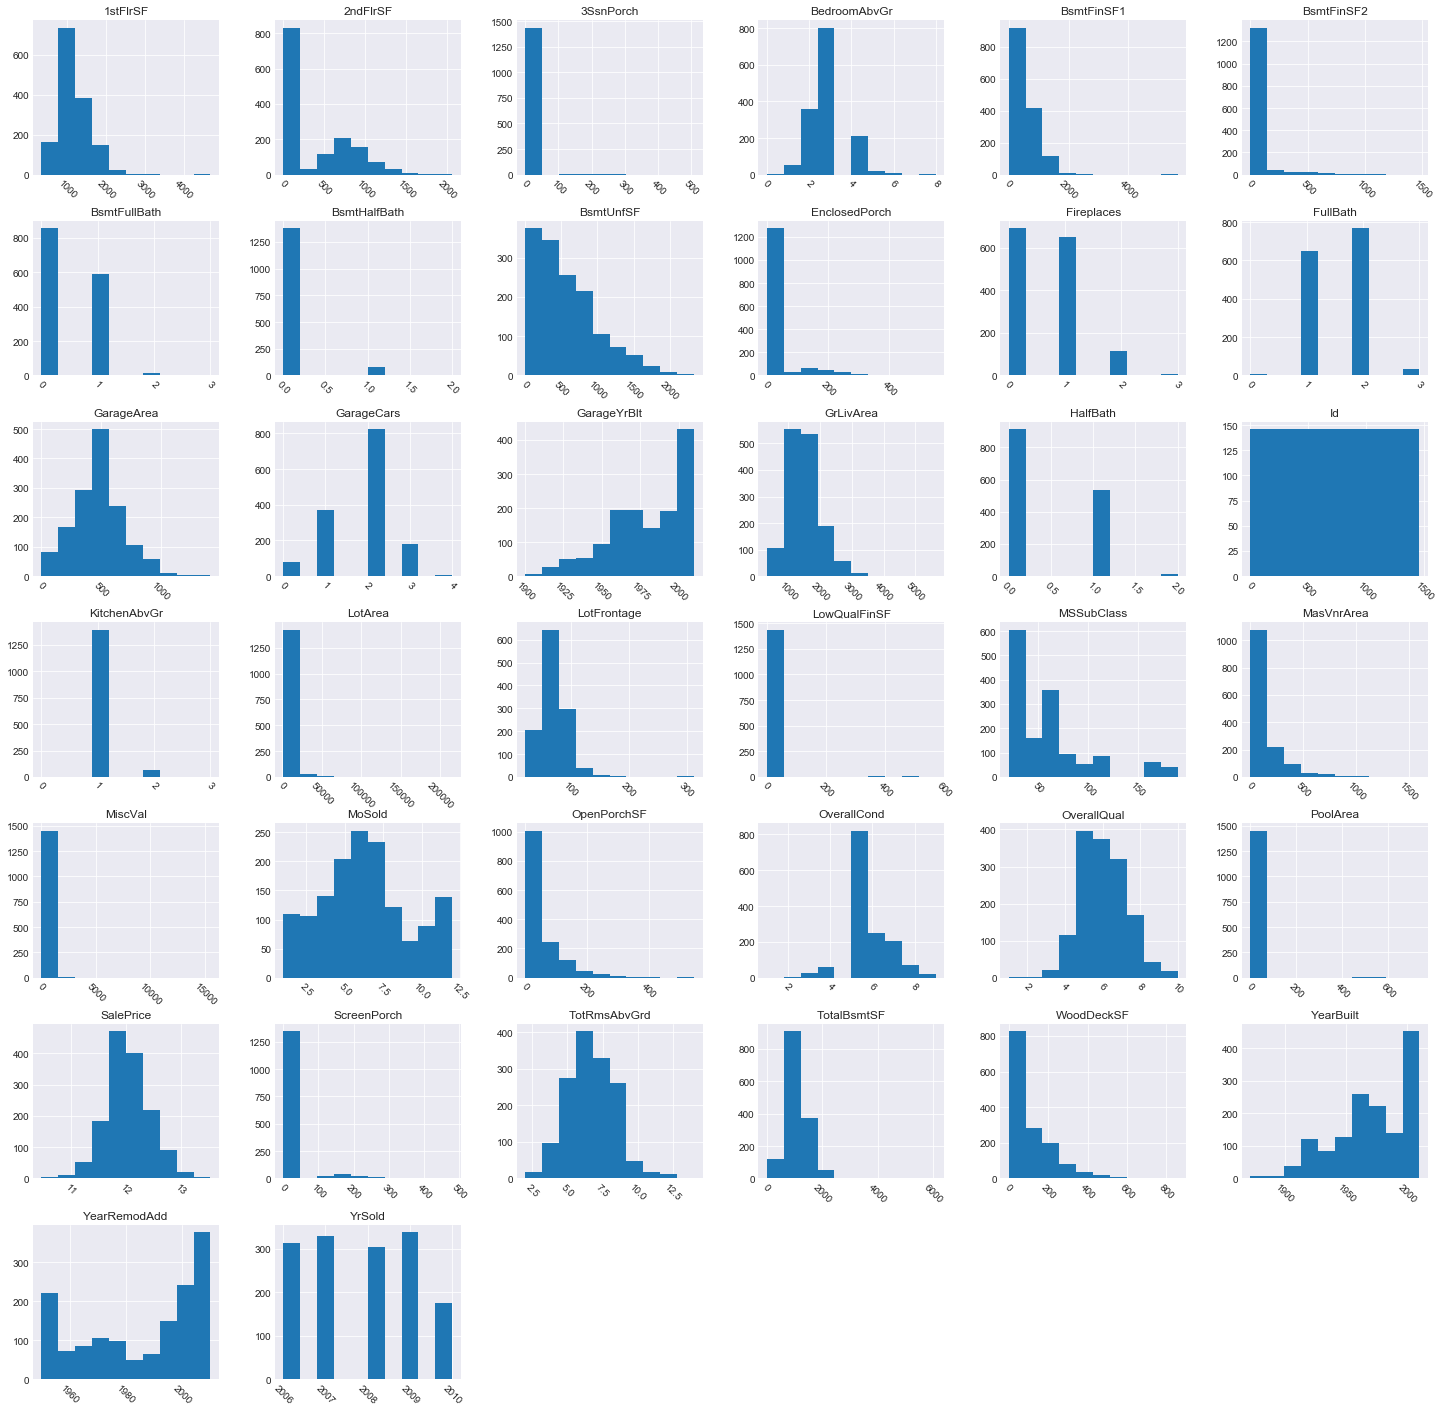

In [581]:
#a 'quick and dirty' grid of histograms:
# Plot histogram grid
df.hist(figsize=(25,25),xrot=-45)

# Clear the text "residue"
plt.show()

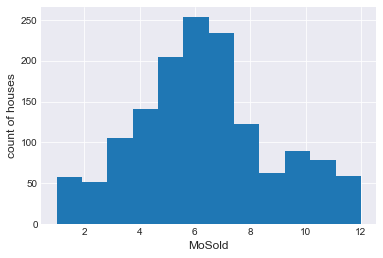

In [582]:
#change the histogram bins for MoSold - bin for every month:
df.MoSold.hist(bins=12)
plt.xlabel('MoSold',fontsize=12)
plt.ylabel('count of houses',fontsize=12)
plt.show()
#most of the sales are in May-July

In [583]:
# Summarize numerical features
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024057
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399449
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775105
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534474


<a id='Categorical Distributions'></a>
### Categorical Distributions
[Back to Chapter3:Exploratory Analysis](#Chapter3:Exploratory Analysis)

In [584]:
# Summarize categorical features
df.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


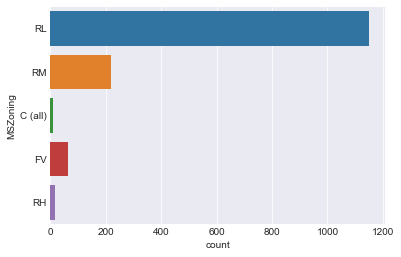

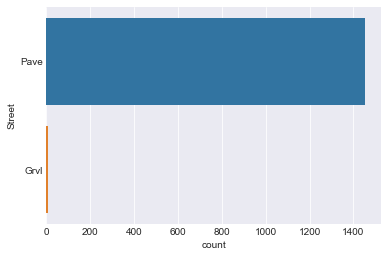

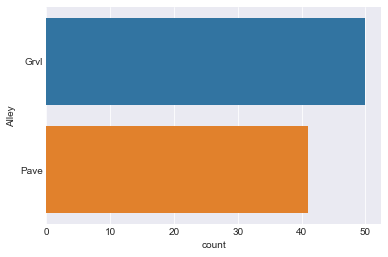

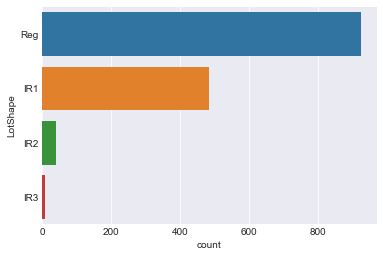

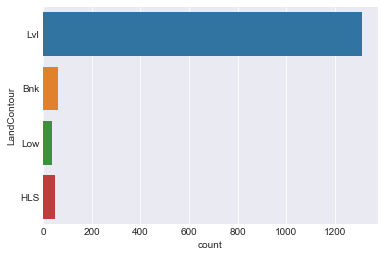

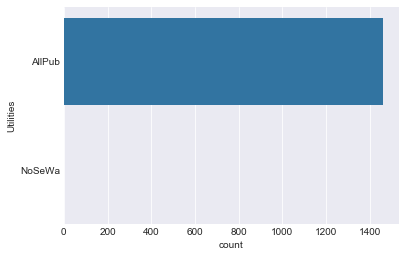

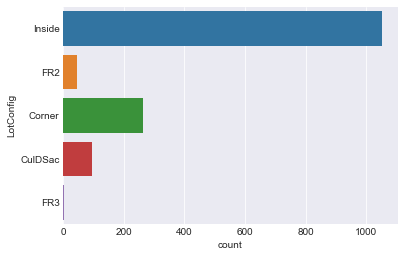

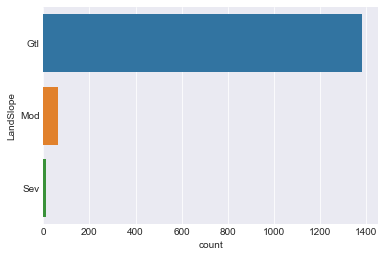

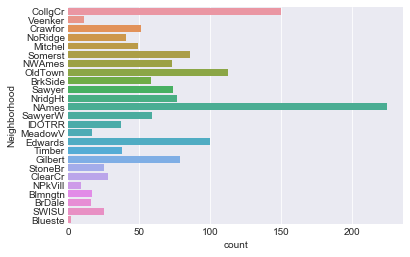

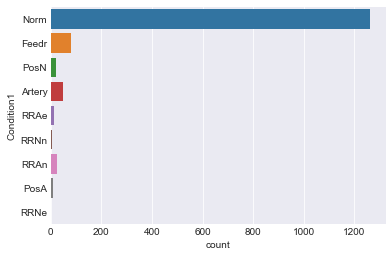

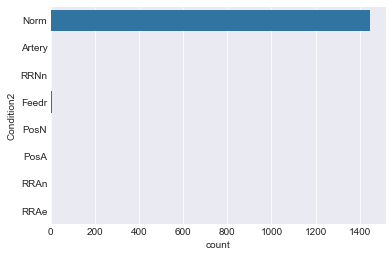

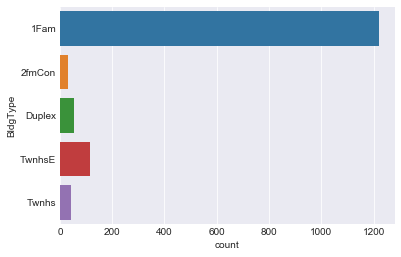

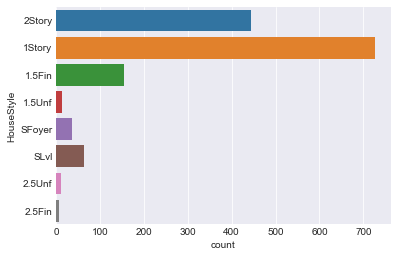

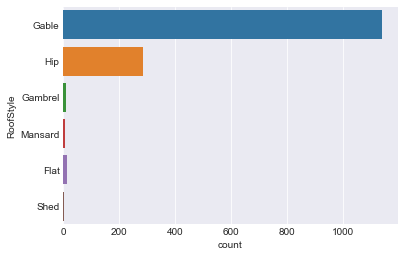

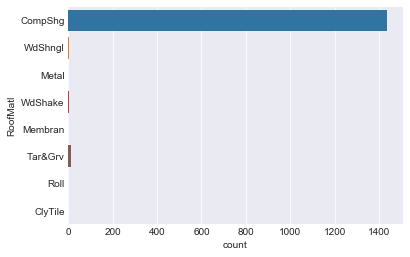

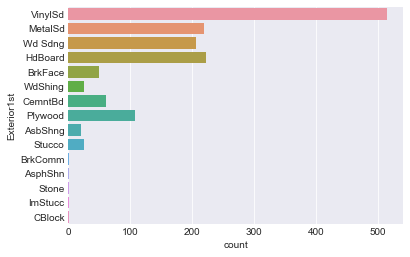

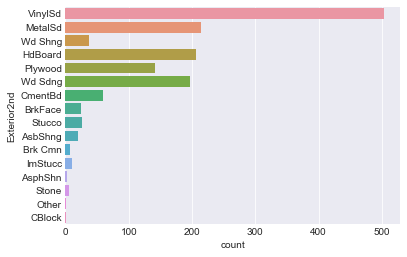

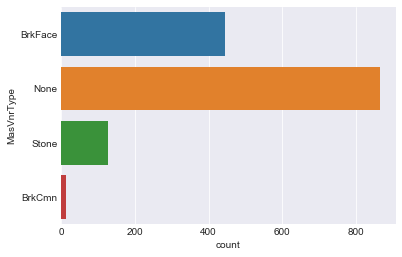

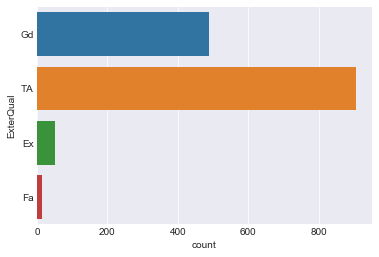

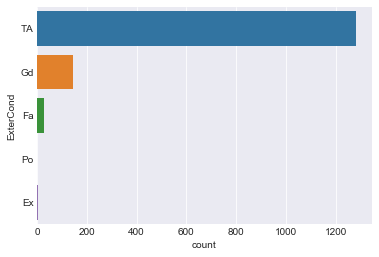

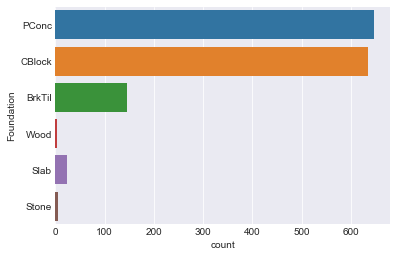

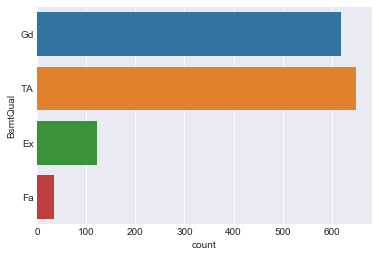

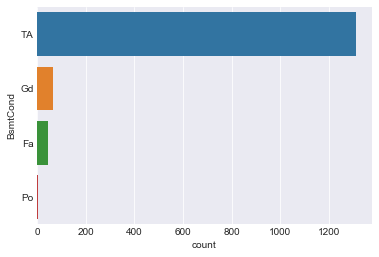

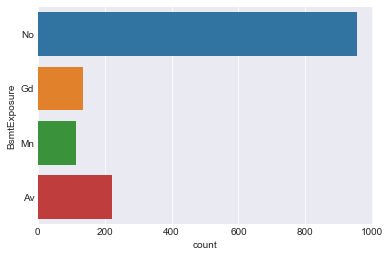

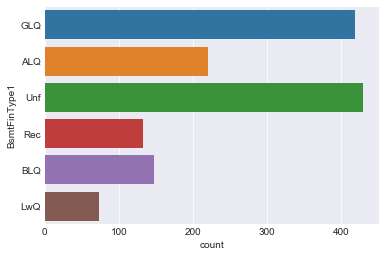

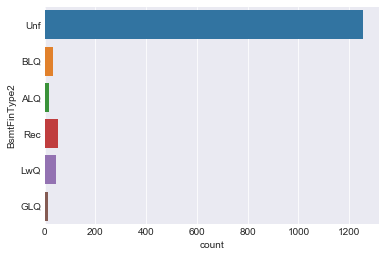

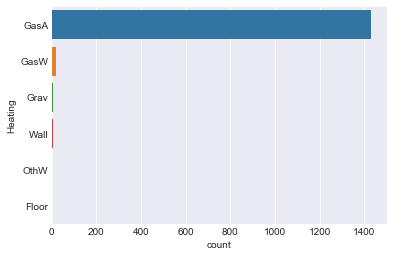

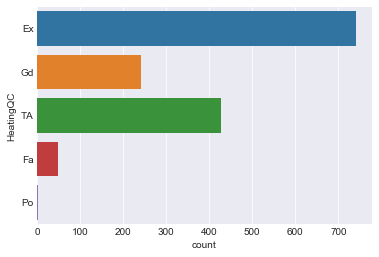

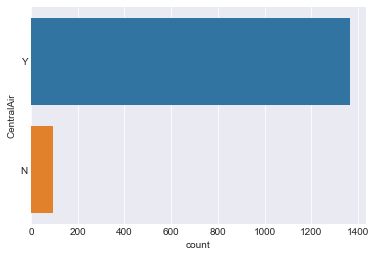

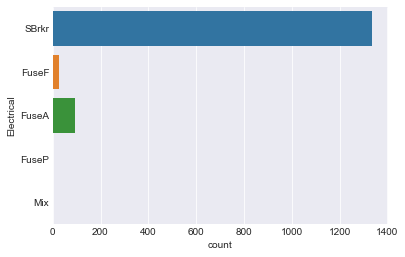

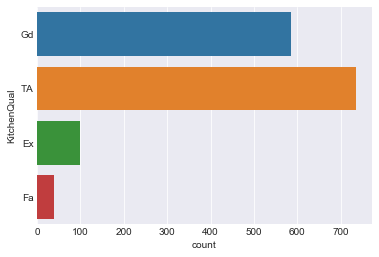

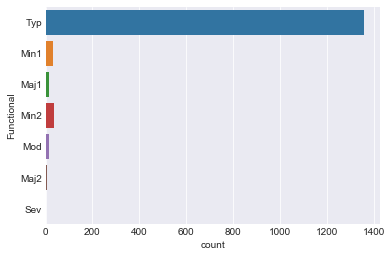

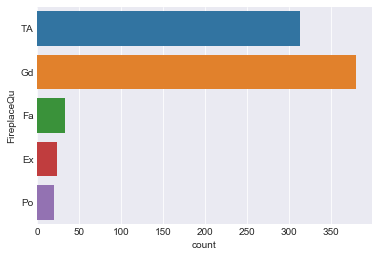

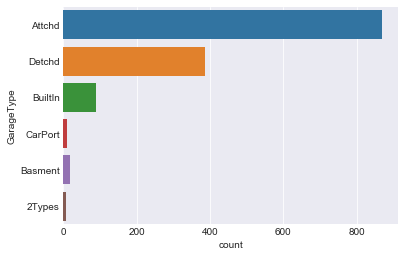

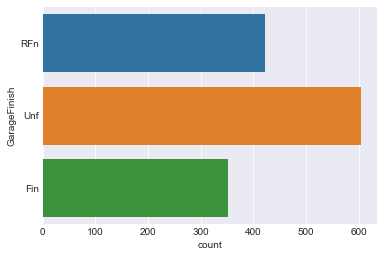

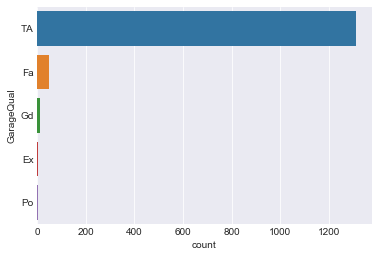

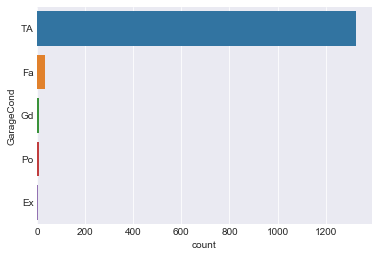

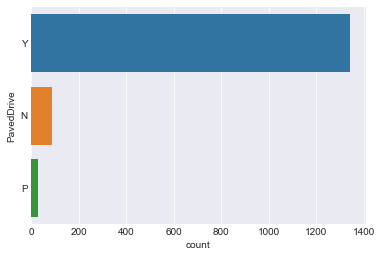

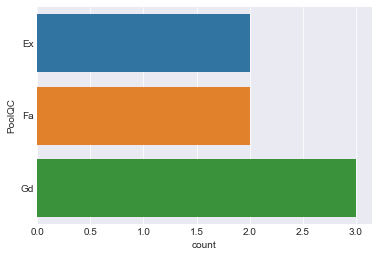

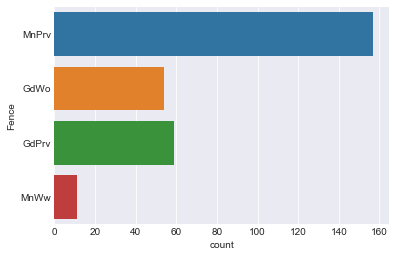

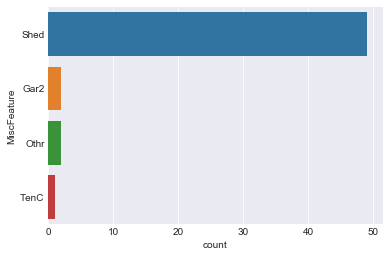

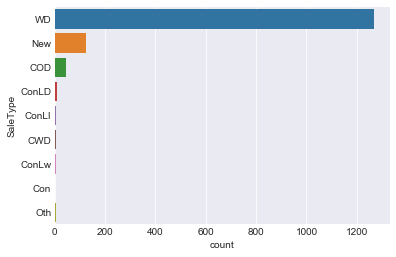

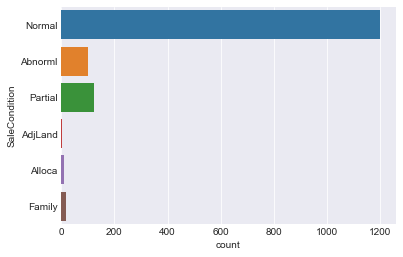

In [585]:
# Plot bar plot for each categorical feature:
for feature in df.select_dtypes(include='object').columns:
    sns.countplot(y=feature, data=df)
    plt.show()

**What to look for in the countplots?**

If we take a look at the frequencies of the classes in each feature, we'll see that:
- Several classes are quite prevalent in the dataset. They have long bars.
- On the flipside, some classes have really short bars.
- These don't have many observations, and they are called sparse classes.
- Sparse classes are classes in categorical features that have a very small number of observations.
- They tend to be problematic when we get to building models.
- In the best case, they don't influence the model much.
- In the worst case, they can cause the model to be overfit.
- Let's make a mental note to combine or reassign some of these classes later.
- We will handle this in Chapter4: Data Cleaning and Chapter5: Feature Engineering.

Let's take a look at each of the features:
* **MSZoning** : most of the values are 'RL'. some 'RM' and 'FV'. maybe we should combine the other classes ('C' and 'RH') to 'OTHER'.
* **Street** :most of the values are 'Pave'. maybe we should drop this feature.
* **Alley** :frequencies of the 2 classes looks Ok
* **LotShape** : most of the values are 'Reg'. some 'IRG1'. maybe we should combine the other classes ('IRG2' and 'IRG3') to 'OTHER'.
* **LandContour** : most of the values are 'Lvl'. maybe we should drop this feature.
* **Utilities** : most of the values are 'AllPub'. maybe we should drop this feature.
* **LotConfig** : most of the values are 'Inside'. some 'Corner' and 'CulDSac'. maybe we should combine the other classes ('FR2' and 'FR3') to 'OTHER'.
* **LandSlope** : most of the values are 'Gtl'. maybe we should drop this feature.
* **Neighborhood** : frequencies of the classes looks Ok
* **Condition1** : most of the values are 'Norm'. maybe we should drop this feature.
* **Condition2** : most of the values are 'Norm'. maybe we should drop this feature.
* **BldgType** : most of the values are '1Fam'. maybe we should combine the other classes to 'OTHER'.
* **HouseStyle** : most of the values are '1Story'. some '2Story' and '1.5Fin'. maybe we should combine the other classes to 'OTHER'.
* **RoofStyle** : most of the values are 'Gable'. some 'Hip'. maybe we should combine the other classes to 'OTHER'.
* **RoofMatl** :  most of the values are 'CompShg'. maybe we should drop this feature.
* **Exterior1st** : most of the values are 'VinylSd'. some 'MetalSd', 'Wd Sdng', 'HdBoard' and 'Plywood'. maybe we should combine the other classes to 'OTHER'.
* **Exterior2st** : most of the values are 'VinylSd'. some 'MetalSd', 'Wd Sdng', 'HdBoard' and 'Plywood'. maybe we should combine the other classes to 'OTHER'.
* **MasVnrType** : most of the values are 'None'. maybe we should drop this feature.
* **ExterQual** : combine 'TA' with 'Fa' and 'Gd' with 'Ex'.
* **ExterCond** : maybe we should drop this feature.
* **Foundation** : almost half of the values are 'Pconc' and the almost the other half is 'CBlock'.  maybe we should combine the other classes to 'OTHER'.
* **BsmtQual** :  combine 'TA' with 'Fa' and 'Gd' with 'Ex'.
* **BsmtCond** :  maybe we should drop this feature.
* **BsmtExposure** : create a boolean feature: 1 for any type of Exposure ('Gd','Mn' and 'Av'), 0 for 'No' ('No Exposure').
* **BsmtFinType1** : frequencies of the classes looks Ok
* **BsmtFinType2** : maybe we should drop this feature.
* **Heating** : maybe we should drop this feature.
* **HeatingQC** : combine 'TA' with 'Fa' and 'Po'.combine with 'Gd' with 'Ex'.
* **CentralAir** : maybe we should drop this feature.
* **Electrical** : maybe we should drop this feature.
* **KitchenQual** : combine 'TA' with 'Fa' and 'Po'.combine with 'Gd' with 'Ex'.
* **Functional** : maybe we should drop this feature.
* **FireplaceQu** : combine 'Fa' and 'Po'.combine 'Gd' with 'Ex'.
* **GarageType** : most of the values are 'Attchd'. some 'Detchd' and 'BuiltIn'. maybe we should combine the other classes ('CarPort','Basment' and '2Types') to 'OTHER'.
* **GarageFinish** : frequencies of the classes looks Ok.
* **GarageQual** : maybe we should drop this feature.
* **GarageCond** : maybe we should drop this feature.
* **PavedDrive** : create a boolean feature: 1 for 'Y', 0 for 'N' and 'P'.
* **PoolQc** : most of the values are null (only 7 values with 3 classes). maybe we should drop this feature.
* **Fence** : looks like most of the values are null. maybe we should drop this feature.
* **MiscFeature** : maybe we should drop this feature.
* **SaleType** : most of the values are 'WD'. maybe we should combine the other classes to 'OTHER'.
* **SaleCondition** : most of the values are 'Normal'. maybe we should combine the other classes to 'OTHER'.

<a id='Segmentations'></a>
### Segmentations
[Back to Chapter3:Exploratory Analysis](#Chapter3:Exploratory Analysis)

Segmenting the target variable by key categorical features.
Because there are many features and we dont know what to focus on, we can do 'quick and dirty' Feature Impotance:

In [586]:
#remove the columns with lots of NULL values:   
train_without_columns_with_lots_of_nan=df.drop(labels=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)
train_without_columns_with_lots_of_nan.shape

(1460, 76)

In [587]:
#remove rows with atleast one NULL value:   
train_without_nan=train_without_columns_with_lots_of_nan.dropna()
print(train_without_nan.shape)
train_without_nan.head()

(1094, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429220


In [588]:
#create dummies feature for the categorical features:
train_with_dummies=pd.get_dummies(train_without_nan)
print(train_with_dummies.shape)
train_with_dummies.head()

(1094, 261)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699,0,0,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109016,0,0,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317171,0,0,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849405,0,0,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429220,0,0,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [589]:
#run RandomForestRegressor to find the features with the highest scores - these are probably the most influence on the SalePrice
X = train_with_dummies.drop(labels=['SalePrice','Id'], axis=1)
Y = train_with_dummies["SalePrice"]
names = X.columns.values
rf = RandomForestRegressor()
rf.fit(X, Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

#http://blog.datadive.net/selecting-good-features-part-iii-random-forests/

Features sorted by their score:
[(0.5981, 'OverallQual'), (0.1036, 'GrLivArea'), (0.0355, '1stFlrSF'), (0.0272, 'TotalBsmtSF'), (0.0256, 'GarageCars'), (0.0188, 'YearBuilt'), (0.016, 'BsmtFinSF1'), (0.0126, 'GarageFinish_Unf'), (0.0114, 'LotFrontage'), (0.0112, 'YearRemodAdd'), (0.0099, 'LotArea'), (0.0098, 'MSZoning_C (all)'), (0.0092, 'CentralAir_N'), (0.0074, 'OverallCond'), (0.0073, 'GarageArea'), (0.0051, 'BsmtUnfSF'), (0.0042, 'MSZoning_RM'), (0.0039, 'GarageType_Detchd'), (0.0035, '2ndFlrSF'), (0.0033, 'MoSold'), (0.0033, 'GarageYrBlt'), (0.0032, 'OpenPorchSF'), (0.0026, 'Neighborhood_OldTown'), (0.0026, 'Fireplaces'), (0.0024, 'KitchenAbvGr'), (0.0022, 'EnclosedPorch'), (0.002, 'BedroomAbvGr'), (0.0018, 'WoodDeckSF'), (0.0018, 'SaleCondition_Family'), (0.0018, 'MasVnrArea'), (0.0018, 'MSSubClass'), (0.0017, 'FullBath'), (0.0017, 'BsmtQual_TA'), (0.0015, 'Exterior2nd_VinylSd'), (0.0015, 'BsmtQual_Fa'), (0.0014, 'TotRmsAbvGrd'), (0.0014, 'SaleType_WD'), (0.0012, 'Exterior1st_Viny

As we can see, the most "important" feature is OverallQual, by a large difference from the other features.

OverallQual - Rates the overall material and finish of the house:
- 10	Very Excellent
- 9	Excellent
- 8	Very Good
- 7	Good
- 6	Above Average
- 5	Average
- 4	Below Average
- 3	Fair
- 2	Poor
- 1	Very Poor


The other features which are less important (after OverallQual):
- (0.1036, 'GrLivArea') - Above grade (ground) living area square feet
- (0.0355, '1stFlrSF') - First Floor square feet
- (0.0272, 'TotalBsmtSF') -  Total square feet of basement area
- (0.0256, 'GarageCars') -  Size of garage in car capacity
- (0.0188, 'YearBuilt') - Original construction date
- (0.016, 'BsmtFinSF1') - Type 1 finished square feet


We can think of ideas for Feature Engineering from those features. mainly from OverallQual.

For 2ndFlrSF and 1stFlrSF we can create new feature: TotalFlrSF=First Floor square feet+Second floor square feet.

For YearRemodAdd and YearBuilt we will create new features for the age of the house and age of the remodeling.

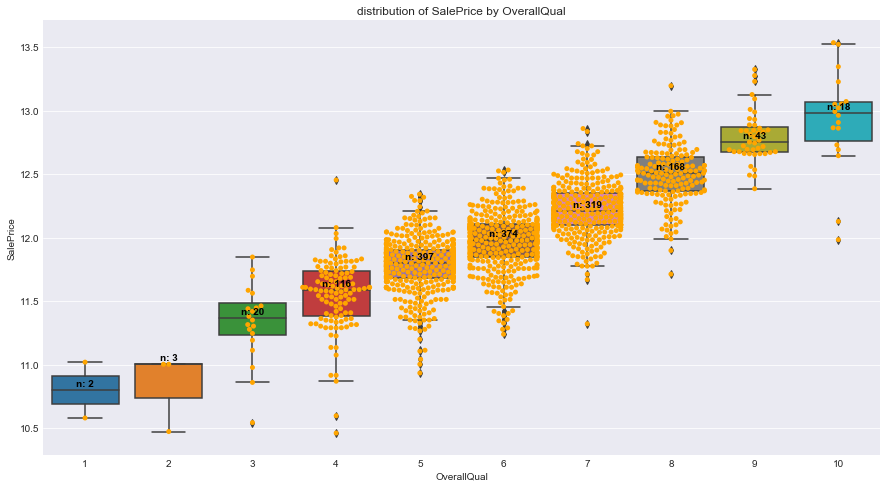

In [590]:
#Segment 'SalePrice' by 'OverallQual' and plot the resulting distributions:
#(The type of OverallQual is Int but it is actually a categorical)
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=df)
ax = sns.swarmplot(x="OverallQual", y="SalePrice", data=df, color="orange")
plt.title("distribution of SalePrice by OverallQual")

# Calculate number of obs per segment & median to position labels
medians = df.groupby(['OverallQual'])['SalePrice'].median().values
nobs = df['OverallQual'].value_counts().sort_index().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
    horizontalalignment='center', size='medium', color='black', weight='semibold')

#https://python-graph-gallery.com/38-show-number-of-observation-on-boxplot/
#https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/
#https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/stats-box-whisker-plots/v/another-example-constructing-box-plot

**Here are a few insights we could draw from the following chart:**

- It looks like a normal distribution-most of the houses are in the middle (classes 5-7). The difference in distributions between classes make intuitive sense.
- It looks like the higher the Rates the overall material and finish of the house, the higher the house price.
- There are some outliers - Houses sold at a very expensive or very cheap price.
- Maybe we should combine some classes together.

<a id='Correlations'></a>
### Correlations
[Back to Chapter3:Exploratory Analysis](#Chapter3:Exploratory Analysis)

Plot the correlation isn't a necessary step but it can help us see relationships between features and guide us where to pay attention. 
We are primarily looking to gain a better intuitive understanding of the data, which will help us throughout the rest of the project.

Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison (intuitive definition).

- Positive correlation means that as one feature increases, the other increases.
- Negative correlation means that as one feature increases, the other decreases.
- Correlations near -1 or 1 indicate a strong relationship.
- Those closer to 0 indicate a weak relationship.
- 0 indicates no relationship.

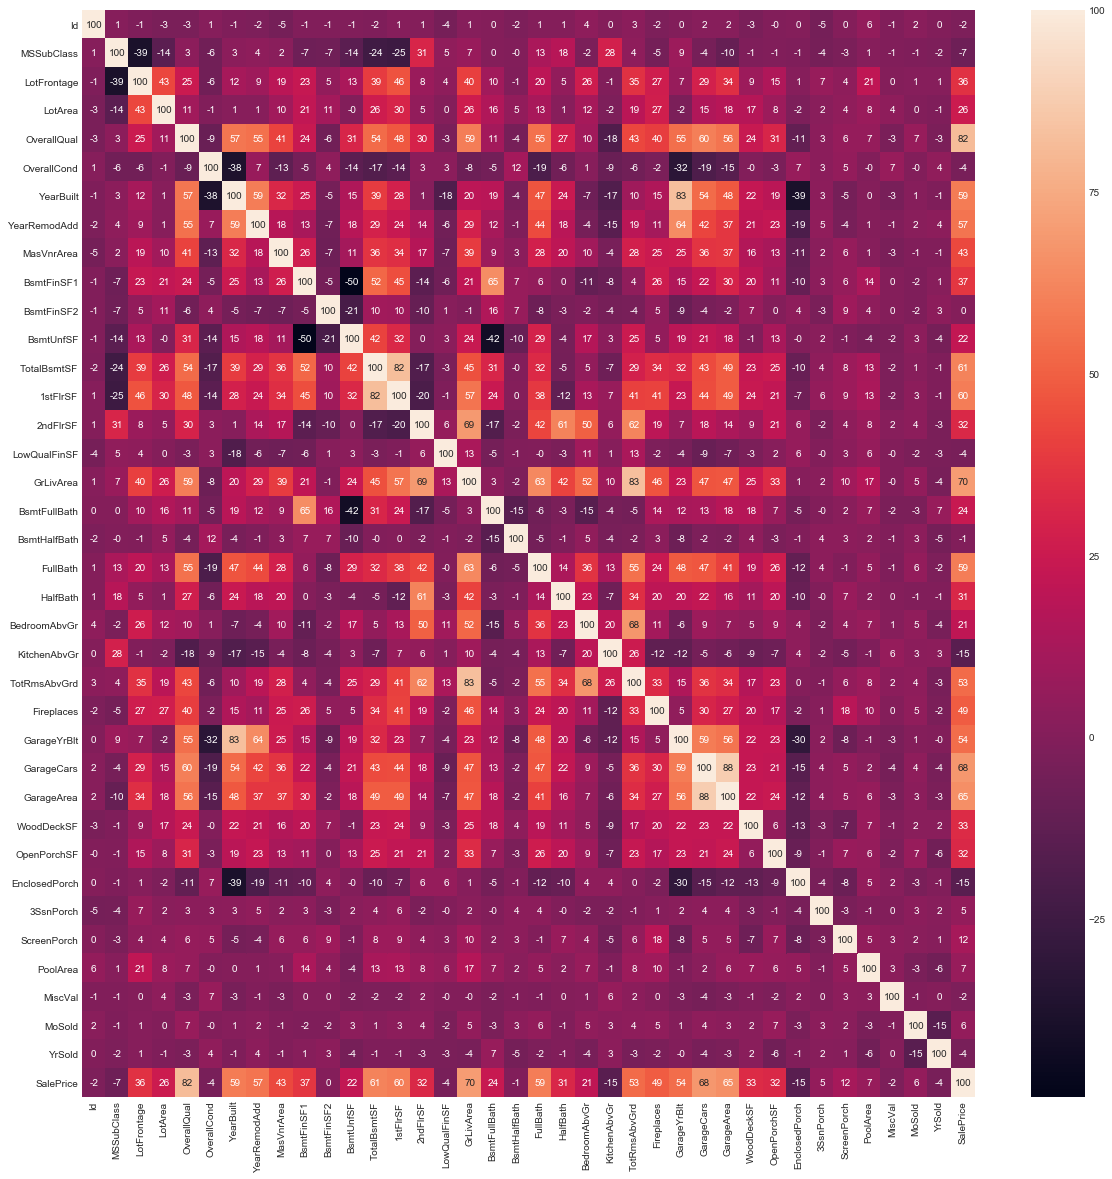

In [591]:
# Calculate correlations between numeric features
correlations = df.corr()

#visualize the correlation:
# Change color scheme
sns.set_style("white")
# Make the figsize 20 x 20
plt.figure(figsize=(20,20))

# Plot heatmap of correlations
sns.heatmap(correlations*100, annot=True, fmt='.0f')
plt.show()

Perhaps the most helpful way to interpret this correlation heatmap is to first find features that are correlated with our target variable.

* Scan the row to see if any of the boxes are white (strong positive correlation) or black (strong negative correlation).
* As expected, there is a strong positive correlation between 'SalePrice' and 'OverallQual'
* As expected, there is a strong positive correlation between 'SalePrice' and 'GrLivArea'


<a id='Chapter4:Data Cleaning'></a>
## Chapter4:Data Cleaning
[Back to Table of Contents](#content)

<a id='Unwanted Observations'></a>
### Unwanted Observations
[Back to Chapter4:Data Cleaning](#Chapter4:Data Cleaning)

In [592]:
#Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(1460, 81)


It looks like we didn't have any duplicates in our dataset.

Now,check for Irrelevant observations.
Irrelevant observations are those that don't actually fit the specific problem that we're trying to solve.
Because the data is from Kaggle, I suppose there are no irrelevant observations.

<a id='Structural Errors'></a>
### Structural Errors
[Back to Chapter4:Data Cleaning](#Chapter4:Data Cleaning)

Structural errors are those that arise during measurement, data transfer, or other types of "poor housekeeping."

**check for variables that should actually be binary indicator variables:**

In [593]:
df['CentralAir'].values

array(['Y', 'Y', 'Y', ..., 'Y', 'Y', 'Y'], dtype=object)

We will transform to an indicator feature later ([Chapter5:Feature Engineering:Dummy Variables](#Dummy Variables)).

**Typos and capitalization:**

let's check for typos or inconsistent capitalization. This is mostly a concern for categorical features.

we can see in the bar plot for each categorical feature [above](#Categorical Distributions) that there are no typos or inconsistent capitalization.

**Mislabeled classes: **

we'll check for classes that are labeled as separate classes when they should really be the same.

e.g. If 'N/A' and 'No building' appear in MSSubClass as two separate classes, we should combine them.
I wrote lots of options we could do. I've done some of them later in the chapter.

<a id='Unwanted Outliers'></a>
### Unwanted Outliers
[Back to Chapter4:Data Cleaning](#Chapter4:Data Cleaning)

[Documentation][1] for the Ames Housing Data indicates that there are outliers present in the training data:


""
SPECIAL NOTES:
There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.
""

[1]: http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt "Link to the Documentation"

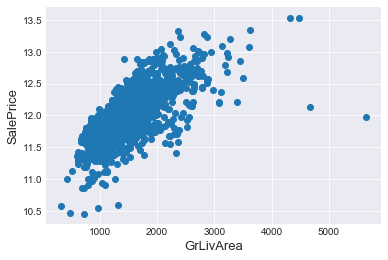

In [601]:
#explore the outliers:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We can see at the bottom right two with extremely large GrLivArea that are of a low price.
These values are huge oultliers. Therefore, we can safely delete them (and the other houses with more than 4000 square feet).

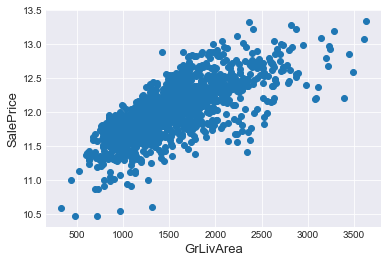

In [603]:
#create a function that drops outliers:
def drops_outliers(data):
    data.drop(data[(data['GrLivArea']>4000)].index, inplace=True)
    return data

#drop only in the train (becasue we dont know the sale price in the test set)
drops_outliers(df)

#Check the graphic again:
fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

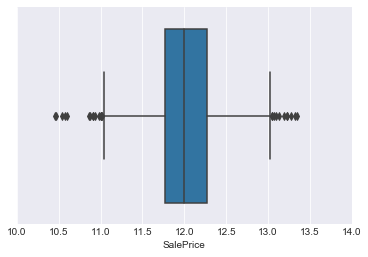

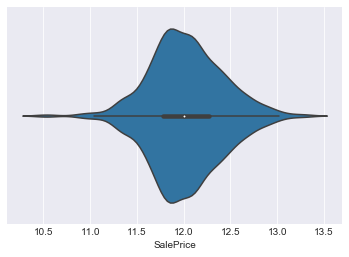

count    1456.000000
mean       12.021950
std         0.396077
min        10.460271
25%        11.774528
50%        12.001512
75%        12.273736
max        13.345509
Name: SalePrice, dtype: float64


In [606]:
#Box plot of 'SalePrice':
sns.boxplot(df.SalePrice)
plt.xlim(10, 14) # setting x-axis range to be the same as in violin plot
plt.show()

# Violin plot of 'SalePrice':
sns.violinplot(df.SalePrice)
plt.show()

print(df.SalePrice.describe())

Interpretation - box plot:

* The two vertical bars on the ends are the min and max values.
* The box in the middle is the interquartile range (25th percentile to 75th percentile).
* Half of all observations fall in that box.
* Finally, the vertical bar in the middle of the box is the median.

Interpretation - violin plot:

* In the violin plot, the thin horizontal bar represents the range (min to max) of the data.
* The thick horizontal bar is the interquartile range (25th percentile to 75th percentile).
* The white dot is the median.
* Finally, the thickness of the "violin" represents the estimated probability density.

In [607]:
df.SalePrice.sort_values(ascending=False).head()

1169    13.345509
898     13.323929
803     13.275829
1046    13.229570
440     13.226725
Name: SalePrice, dtype: float64

<a id='Missing Categorical Data'></a>
### Missing Categorical Data
[Back to Chapter4:Data Cleaning](#Chapter4:Data Cleaning)

In [608]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

PoolQC           1451
MiscFeature      1402
Alley            1365
Fence            1176
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
BldgType            0
LandContour         0
LotConfig           0
Utilities           0
RoofStyle           0
LotShape            0
Street              0
HouseStyle          0
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
MSZoning            0
dtype: int64

There are few features that most of there values are null.

maybe we should drop them:
- PoolQC           1453 rows are null
- MiscFeature      1406 rows are null
- Alley            1369 rows are null
- Fence            1179 rows are null
- FireplaceQu       690 rows are null


In [609]:
#create a function that fills the missing values for categorical features
def fillna_categorical_features(data):
     # loop that fills the value 'Missing' to all of the missing values:
    for feature in data.select_dtypes(include=['object']):
        data[feature] = data[feature].fillna('Missing')   
    return data

#create the transformer for the function:
fillna_categorical_features_transformer = FunctionTransformer(func=fillna_categorical_features, validate=False, accept_sparse=False)

<a id='Missing Numeric Data'></a>
### Missing Numeric Data
[Back to Chapter4:Data Cleaning](#Chapter4:Data Cleaning)

In [610]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
BsmtFinSF1         0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
SalePrice          0
BsmtFullBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
MSSubClass         0
GrLivArea          0
BsmtHalfBath       0
YrSold             0
FullBath           0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
Id                 0
dtype: int64

Most of the values in those features are not null so we keep them.

In [611]:
#for the relevent features, create Indicator features and fill missing values with 0:
def create_feature_for_null_and_fill_with_zero(data):
    cols_ind_null=data.isnull().any()>0
    cols_with_null_value=[val for val in cols_ind_null[cols_ind_null==True].index]
    for col in cols_with_null_value:
        data[col+"_null"]=data[col].isnull().astype(int)
        data[col].fillna(0, inplace=True)
    return data

#create the transformer for the function:
create_feature_for_null_and_fill_with_zero_transformer = FunctionTransformer(func=create_feature_for_null_and_fill_with_zero, validate=False, accept_sparse=False) 

<a id='Pipeline for DataCleaning'></a>
### Pipeline for DataCleaning
[Back to Chapter4:Data Cleaning](#Chapter4:Data Cleaning)

In [612]:
# Creating a pipeline object for the DataCleaning transformers:
DataCleaning_pipeline = Pipeline([('fillna_categorical_features', fillna_categorical_features_transformer),
                                  ('create_feature_for_null_and_fill_with_zero', create_feature_for_null_and_fill_with_zero_transformer)])

In [613]:
# Transforming the datasets:
df_list = [df,df_test] #the train set and the test set respectively
for i,item in enumerate(df_list):
    df_list[i] = DataCleaning_pipeline.transform(df_list[i])
df, df_test = df_list

In [614]:
## Confirm that we dont have any missing Numeric values:
for data in [df,df_test]:
    print(data.select_dtypes(exclude=['object']).isnull().sum().sort_values(ascending=False))

GarageYrBlt_null    0
FullBath            0
BsmtFullBath        0
GrLivArea           0
LowQualFinSF        0
2ndFlrSF            0
1stFlrSF            0
TotalBsmtSF         0
BsmtUnfSF           0
BsmtFinSF2          0
BsmtFinSF1          0
MasVnrArea          0
YearRemodAdd        0
YearBuilt           0
OverallCond         0
OverallQual         0
LotArea             0
LotFrontage         0
MSSubClass          0
BsmtHalfBath        0
HalfBath            0
MasVnrArea_null     0
BedroomAbvGr        0
LotFrontage_null    0
SalePrice           0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
GarageArea          0
GarageCars          0
GarageYrBlt         0
Fireplaces          0
TotRmsAbvGrd        0
KitchenAbvGr        0
Id                  0
dtype: int64
GarageArea_null      0
GarageCars_null      0
BedroomAbvGr         0
HalfBath        

In [616]:
## Confirm that we dont have any missing Object values:
for data in [df,df_test]:
    print(data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False))

SaleCondition    0
Condition2       0
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0
BldgType         0
Condition1       0
Foundation       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Alley            0
Street           0
ExterCond        0
BsmtQual         0
SaleType         0
FireplaceQu      0
MiscFeature      0
Fence            0
PoolQC           0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageFinish     0
GarageType       0
Functional       0
BsmtCond         0
KitchenQual      0
Electrical       0
CentralAir       0
HeatingQC        0
Heating          0
BsmtFinType2     0
BsmtFinType1     0
BsmtExposure     0
MSZoning         0
dtype: int64
SaleCondition    0
Condition2       0
ExterQual        0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
HouseStyle       0

In [617]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_df.csv', index=None)
df_test.to_csv('cleaned_df_test.csv', index=None)

<a id='Chapter5:Feature Engineering'></a>
## Chapter5:Feature Engineering
[Back to Table of Contents](#content)

In [618]:
# Load cleaned dataset
df = pd.read_csv('cleaned_df.csv')
df_test = pd.read_csv('cleaned_df_test.csv')

<a id='Business knowledge'></a>
### Business knowledge
[Back to Chapter5:Feature Engineering](#Chapter5:Feature Engineering)

We can think about new features that can help to the model.

<a id='Interaction Features'></a>
### Interaction Features
[Back to Chapter5:Feature Engineering](#Chapter5:Feature Engineering)

Interaction features are operations between two or more other features.

In [503]:
def create_feature_age(data):
    for col in ['YearBuilt','GarageYrBlt','YearRemodAdd']:
        diff_between_col=data['YrSold'] - data[col]
        data[col+"Age"]= np.where((diff_between_col>0)&(data[col]>0),diff_between_col, 0)
        #WHERE for the cases: there are values that dont make sense. plus, for cases there wasn no remodeling (YearRemodAdd value is "same as construction date if no remodeling or additions")
        #data[col]>0 for cases where we filled the missing values with 0
    return data

#create the transformer for the function:
create_feature_age_transformer = FunctionTransformer(func=create_feature_age, validate=False, accept_sparse=False) 

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house.

In [619]:
def Adding_total_sqfootage_feature(data):
    data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
    return data

#create the transformer for the function:
Adding_total_sqfootage_feature_transformer = FunctionTransformer(func=Adding_total_sqfootage_feature, validate=False, accept_sparse=False) 

<a id='Sparse Classes'></a>
### Sparse Classes
[Back to Chapter5:Feature Engineering](#Chapter5:Feature Engineering)

The next step we could consider is grouping sparse classes together (in our categorical features).

I wrote few ideas [above](#Categorical Distributions).
Maybe I'll try few ideas in the future.

<a id='Remove Unused'></a>
### Remove Unused
[Back to Chapter5:Feature Engineering](#Chapter5:Feature Engineering)

Remove unused or redundant features:

In [620]:
#Drop 'Alley','FireplaceQu','PoolQC','Fence','MiscFeature' from the dataset beacuse most of there values are null
def Drop_Unused_fetures(data):
    data = data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)
    return data

#create the transformer for the function:
Drop_Unused_fetures_transformer = FunctionTransformer(func=Drop_Unused_fetures, validate=False, accept_sparse=False) 

<a id='Dummy Variables'></a>
### Dummy Variables
[Back to Chapter5:Feature Engineering](#Chapter5:Feature Engineering)

In [621]:
# change some features to Categorical:
def features_to_categorical(data):
    for feature in ['MSSubClass','OverallQual','OverallCond','MoSold','YrSold']:
        data[feature]=data[feature].astype('category')
    return data

#create the transformer for the function:
features_to_categorical_transformer = FunctionTransformer(func=features_to_categorical, validate=False, accept_sparse=False) 

In [622]:
#change CentralAir to Numeric:
def CentralAir_to_numeric(data):
    CentralAirMap = {'Y': 1, 'N': 0}
    data['CentralAir'] = data['CentralAir'].map(CentralAirMap)
    return data

#create the transformer for the function:
CentralAir_to_numeric_transformer = FunctionTransformer(func=CentralAir_to_numeric, validate=False, accept_sparse=False) 

In [623]:
#Encode dummy variables:
#df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns)

def get_dummies(data):
    data = pd.get_dummies(data)
    return data

#create the transformer for the function:
get_dummies_transformer = FunctionTransformer(func=get_dummies, validate=False, accept_sparse=False) 

<a id='Pipeline for FeatureEngineering'></a>
### Pipeline for FeatureEngineering
[Back to Chapter5:Feature Engineering](#Chapter5:Feature Engineering)

In [624]:
# Load cleaned dataset
df = pd.read_csv('cleaned_df.csv',index_col='Id') 
df_test = pd.read_csv('cleaned_df_test.csv',index_col='Id') #we will need the Id later for the submission

In [625]:
# Creating a pipeline object for the DataCleaning transformers:
FeatureEngineering_pipeline = Pipeline([('create_feature_age', create_feature_age_transformer)
                                        ,('Adding_total_sqfootage_feature',Adding_total_sqfootage_feature_transformer)
                                         ,('Drop_Unused_fetures', Drop_Unused_fetures_transformer)
                                         ,('features_to_categorical', features_to_categorical_transformer)
                                         ,('CentralAir_to_numeric', CentralAir_to_numeric_transformer)
                                         ,('get_dummies', get_dummies_transformer)
                                       ])

In [626]:
# Transforming the datasets:
df_list = [df,df_test] #the train set and the test set respectively
for i,item in enumerate(df_list):
    df_list[i] = FeatureEngineering_pipeline.transform(df_list[i])
df, df_test = df_list

In [634]:
"""Sanity checks Adding_total_sqfootage_feature_transformer"""
for data in [df,df_test]:
    print(data['TotalSF'])

Id
1       2566
2       2524
3       2706
4       2473
5       3343
6       2158
7       3380
8       3197
9       2726
10      2068
11      2080
12      3499
13      1824
14      2988
15      2506
16      1686
17      2008
18      1296
19      2228
20      2368
21      3534
22      1745
23      3572
24      2100
25      2120
26      3166
27      1800
28      3408
29      3084
30      1040
        ... 
1431    2570
1432    1916
1433    1624
1434    2728
1435    2252
1436    2856
1437    1728
1438    3864
1439    2148
1440    2264
1441    2759
1442    1696
1443    3024
1444    1904
1445    2844
1446    1727
1447    2376
1448    3310
1449    1906
1450    1260
1451    2688
1452    3151
1453    1619
1454    2280
1455    2442
1456    2600
1457    3615
1458    3492
1459    2156
1460    2512
Name: TotalSF, Length: 1456, dtype: int64
Id
1461    1778.0
1462    2658.0
1463    2557.0
1464    2530.0
1465    2560.0
1466    2418.0
1467    2355.0
1468    2254.0
1469    2641.0
1470    1764.0
1471    2

In [635]:
#Sanity checks for CentralAir_to_numeric_transformer
for data in [df,df_test]:
    print(data['CentralAir'].dtype)

int64
int64


In [636]:
#Sanity checks for get_dummies_transformer
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,LotFrontage_null,MasVnrArea_null,GarageYrBlt_null,YearBuiltAge,GarageYrBltAge,YearRemodAddAge,TotalSF,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Missing,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,1,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,12.247699,0,0,0,5,5.0,5,2566,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,12.109016,0,0,0,31,31.0,31,2524,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,2001,2002,162.0,486,0,434,920,1,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,12.317171,0,0,0,7,7.0,6,2706,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,1915,1970,0.0,216,0,540,756,1,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,11.849405,0,0,0,91,8.0,36,2473,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12.429220,0,0,0,8,8.0,8,3343,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [637]:
df.shape

(1456, 333)

In [639]:
# Save analytical base table
df.to_csv('analytical_base_table.csv', index='Id')
df_test.to_csv('analytical_base_table_test.csv', index='Id')

<a id='Chapter6:Model Training'></a>
## Chapter6:Model Training
[Back to Table of Contents](#content)

In [731]:
# Load cleaned dataset from Module 3
df = pd.read_csv('analytical_base_table.csv', index_col='Id')
df_test = pd.read_csv('analytical_base_table_test.csv', index_col='Id') 
print(df.shape)
print(df_test.shape)

(1456, 333)
(1459, 332)


<a id='Split Dataset'></a>
### Split Dataset
[Back to Chapter6:Model Training](#Chapter6:Model Training)

There are columns that are in the train but not in the test and vice versa,
so I take columns that are in both of them. 
I know this is not an optimal solution, but this is the easiest solution I could think of without changing big part of the code now.

In [732]:
columns_list_df = df.columns
columns_list_df_test=df_test.columns
columns_list_in_df_and_df_test=columns_list_df.join(columns_list_df_test, how='inner')
columns_list_in_df_and_df_test

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=316)

In [733]:
# Create separate object for target variable
y_train = df.SalePrice

# Create separate object for input features
X_train = df.drop('SalePrice', axis=1)
X_train = X_train[columns_list_in_df_and_df_test]

X_test = df_test[columns_list_in_df_and_df_test]

X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage_null,MasVnrArea_null,GarageYrBlt_null,YearBuiltAge,GarageYrBltAge,YearRemodAddAge,TotalSF,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Missing,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,1,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,0,0,0,5,5.0,5,2566,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,0,0,0,31,31.0,31,2524,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,2001,2002,162.0,486,0,434,920,1,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,0,0,0,7,7.0,6,2706,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,1915,1970,0.0,216,0,540,756,1,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,0,0,0,91,8.0,36,2473,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,0,0,0,8,8.0,8,3343,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [734]:
X_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,LotFrontage_null,MasVnrArea_null,GarageYrBlt_null,YearBuiltAge,GarageYrBltAge,YearRemodAddAge,TotalSF,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,GarageFinish_Fin,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Missing,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Missing,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,1961,1961,0.0,468.0,144.0,270.0,882.0,1,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,0,0,0,49,49.0,49,1778.0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1462,81.0,14267,1958,1958,108.0,923.0,0.0,406.0,1329.0,1,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,0,0,0,52,52.0,52,2658.0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1463,74.0,13830,1997,1998,0.0,791.0,0.0,137.0,928.0,1,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,0,0,0,13,13.0,12,2557.0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1464,78.0,9978,1998,1998,20.0,602.0,0.0,324.0,926.0,1,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,0,0,0,12,12.0,12,2530.0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1465,43.0,5005,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,0,0,0,18,18.0,18,2560.0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


<a id='Model Pipelines'></a>
### Model Pipelines
[Back to Chapter6:Model Training](#Chapter6:Model Training)

In [735]:
#store the pipelines for each of the algorithms in a single dictionary:

# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb'    : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

In [736]:
# Check that we have all 5 algorithms, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


<a id='Declare hyperparameters to tune'></a>
### Declare hyperparameters to tune
[Back to Chapter6:Model Training](#Chapter6:Model Training)

Hyperparameter grids:

I've read that for regularized regression, the most impactful hyperparameter is the strength of the penalty
Alpha (strength of penalty) is a positive value, typically between 0 and 10.
The default value is 1.

In [737]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

#For Elastic Nets, alpha is still important to tune, but there's another one that we'll need-L1 ratio
# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

In [738]:
# Random forest hyperparameters
rf_hyperparameters= {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]    
}

# Boosted tree hyperparameters
gb_hyperparameters= {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [739]:
# Create hyperparameters dictionary
hyperparameters= {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet'  : enet_hyperparameters,
    'rf'    : rf_hyperparameters,
    'gb'    : gb_hyperparameters
                }

In [740]:
#check that hyperparameters is set up correctly:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


<a id='Fit and tune models with cross-validation'></a>
### Fit and tune models with cross-validation
[Back to Chapter6:Model Training](#Chapter6:Model Training)

In [741]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name],scoring='neg_mean_squared_error', cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name]=model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [742]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [743]:
# run this code to check that the models have been fitted correctly
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


<a id='Select Winner'></a>
### Select Winner
[Back to Chapter6:Model Training](#Chapter6:Model Training)

In [744]:
"""Cross-validated training performance:"""

#display the best_score_ attribute for each fitted model:
for name, model in fitted_models.items():
    rmse=np.sqrt(-model.best_score_)
    print( name, rmse )

lasso 0.11324225824682965
ridge 0.12364916067892961
enet 0.11218757005363203
rf 0.1377398946194775
gb 0.1223886790394762


To evaluate the model, we also want to see the performance on the test set,
and not just their cross-validated scores.
But the test set from Kaggle is without the y_test so we just calculate the predictions and submit on Kaggle website
and then we could see the score.

**cross_val_predict** returns for each element in the input, the prediction that was obtained for that element when it was in the test set.


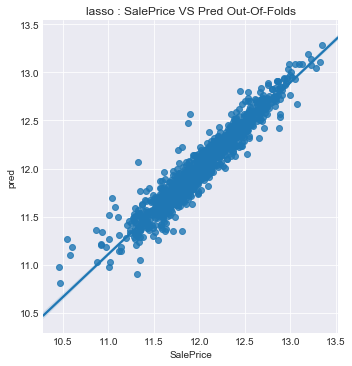

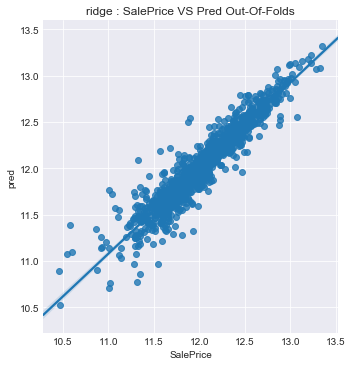

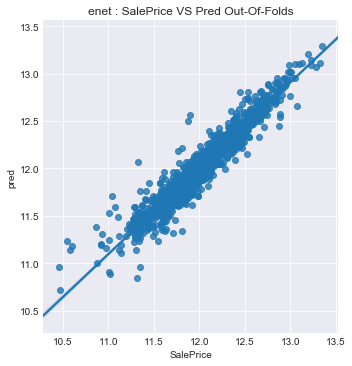

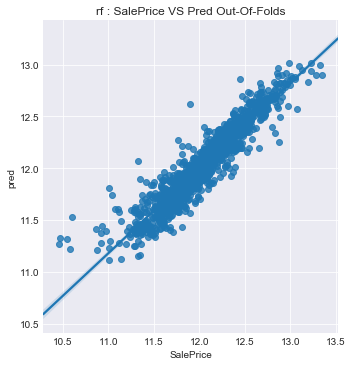

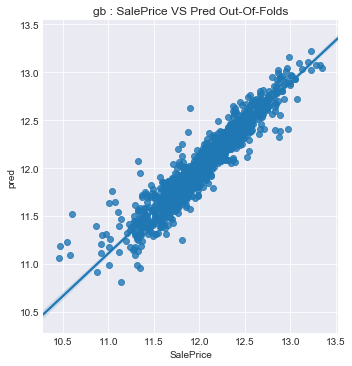

In [745]:
#Plotting Cross-Validated Predictions - the "dev" set (Out-Of-Folds):
y_train_and_pred_out_of_folds=pd.DataFrame(y_train)
for name, model  in fitted_models.items():
    y_train_and_pred_out_of_folds['pred'] = 
    cross_val_predict(model.best_estimator_, X_train, y_train)
    sns.lmplot(x='SalePrice', y='pred', data=y_train_and_pred_out_of_folds)
    plt.title("{} : SalePrice VS Pred Out-Of-Folds".format(name))

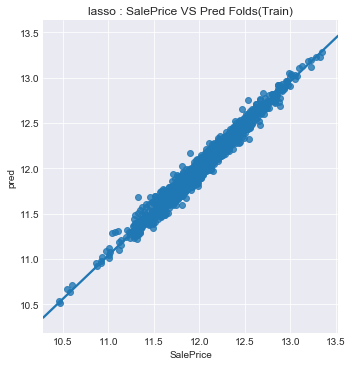

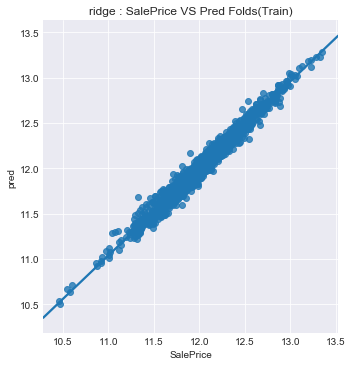

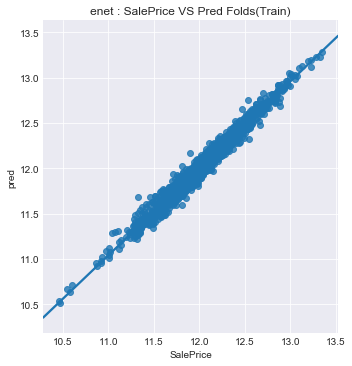

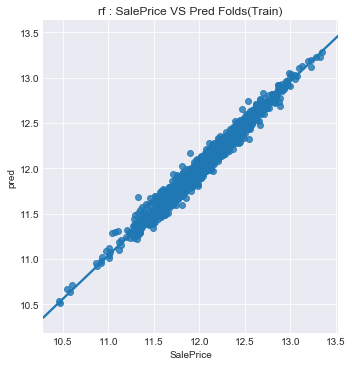

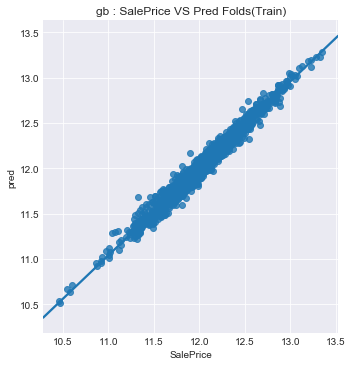

In [746]:
#Plotting Train Predictions:
y_train_and_pred=pd.DataFrame(y_train)
for name, model  in fitted_models.items():
    y_train_and_pred['pred']=fitted_models[algorithm].predict(X_train)
    sns.lmplot(x='SalePrice', y='pred', data=y_train_and_pred)
    plt.title("{} : SalePrice VS Pred Folds(Train)".format(name))

This visual check is a nice way to confirm our models performances.

As expected, we can see that the predictions on the out-of-folds set are a little less accurate.

As of this stage, ElasticNet gives the best score.
Thats why we choose it for calculate the test's predictions.

In [747]:
# Predict test set using fitted 'enet':
X_test['SalePrice'] = fitted_models['enet'].predict(X_test)

In [748]:
#transform back to the real price:
X_test['SalePrice']=np.expm1(X_test['SalePrice'])

In [749]:
to_sub_df=pd.DataFrame(X_test['SalePrice'])
print(to_sub_df.head())
# Save cleaned dataframe to new file
to_sub_df.to_csv('to_sub20180722_2.csv')

          SalePrice
Id                 
1461  120976.418714
1462  152313.035074
1463  184365.150351
1464  195493.946449
1465  193950.567942


For this competition, submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value 
and the logarithm of the observed sales price.
(Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

The leaderboard is calculated with approximately 50% of the test data.
The final results will be based on the other 50%, so the final standings may be different.

**My experiments:**

- Right now, (submission #3) after calculate the score by RMSE:  my submission scored 0.12823.I advanced 860 places on the leaderboard! 1446 place.

- submission #2 - after drop outliers: my submission scored 0.14756. 2304 place out of 4937.
It's not a good place but I'll keep try to improve my score.

- submission #1: my submission scored 0.14514. 2317 place out of 4937.
It's not a good place but I'll keep try to improve my score.



<a id='Chapter7:Conclusion'></a>
## Chapter7:Conclusion
[Back to Table of Contents](#content)

This was my first end-to-end project. 
My #1 goal of this project was to see the entire applied machine learning workflow from start to finish.
That means I didn't dive into any step in too much detail, but instead I have tried to focus on how they work together.
I learned a lot and will continue to learn and challenge myself.

**Credits:**

- https://elitedatascience.com/
- https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard/notebook
- Ishay's notebook 